# K-Means for Clustering

## Introduction

Clustering is an unsupervised machine learning technique that allows us to determine hidden structure in data. A clustering algorithm does not require to be trained using datasets marked with pre-defined class labels. It rather attempts to discover natural groupings by mining the clusters based on set of well defined criteria. The k-means is one of such algorithms that creates the clusters by minimizing the squared sum of distances between data points and the centeroids of their respective clusters. There also are several other approaches to clustering problem but k-means is simplest, computationaly cheapest yet highly performing. The k-means clustering has applications across several domains, the customer and market segmentation in consumer data, claim segmentation in insurance data, segmenting the stock market tickers according to past performance and anomaly detection in financial statements are only a few to name. 

This beginner's tutorial is aimed at providing a high level step-wise introduction of k-means algorithm to the reader along with a working demonstration in Python language. In next sections we describe successive stages of the algorithm followed by Python code and performance evaluation. One of the major drawbacks of k-means algorithm is that number of clusters to be created has to be specified by user. There is no well defined prescription to correctly determine the number of clusters but there are some popular techniques to enable an educated guess. We present one such technique in one of the later sections. 

## K-Means Algorithm
Let K be the number of clusters specified by the user, then k-means clustering algorithm can then be summarized with following steps.

1. Initialize algorithm by randomly assigning a cluster label (1 to K) to each data point.
2. Compute the centroid for each of the K clusters.
3. Calculate the Euclidean distances between each data point and each centroid.
4. Re-assign the data point to the cluster whose centriod is closest to it.
5. Repeat steps 2 through 5 untill centroids do not change between successive passes.

In the demonstration slide below we show stages in 1st pass of the algorithm. 

0. "Unlabelled Data" : Raw data as input to the algorithm (left).
1. "Cluster Assignment" : Randomly assign cluster labels to data points (middle).
2. "Centroid Computation" : Centroid is computed by calculating vector of feature means (right).


![kmeansassignK](kmeans_step1.png)

In the following slide we show stages during one of the subsequent passes.

3. "Cluster Assignment": Assign each observation to the nearest centroid (left).
4. "Centroid Computation" : Recalculate the centroid like we did at 1st past (middle).
5. "Final State": The state of termination of algorithm after passes saturate(right).

![kmeanscalcK](kmeans_step2.png)

# K-Means with scikit-learn Library
In this section we will demonstrate how to use scikit-learn package in Python to implement the k-means clustering algorithm. First we generate a simulated dataset using inbuilt 'make_blobs' facility and perform a basic exploration.

## Generating the Datasets

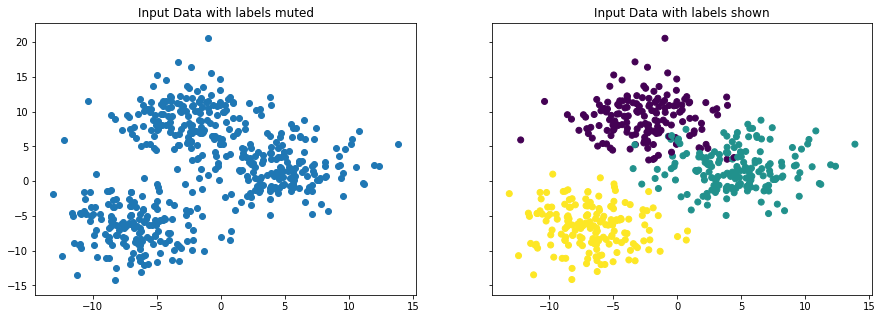

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

# Create Simulated Datasets
X, y = make_blobs(n_samples=500, centers=3, cluster_std=3,random_state=42)
#Data visualization.
f1, ((ax1, ax2)) = plt.subplots(1,2, sharey=True,figsize=(15,5))
ax1.scatter(X[:,0],X[:,1])
ax1.set_title("Input Data with labels muted")
ax2.set_title("Input Data with labels shown")
ax2.scatter(X[:,0],X[:,1], c=y)
plt.show()

## Calling the Algorithm

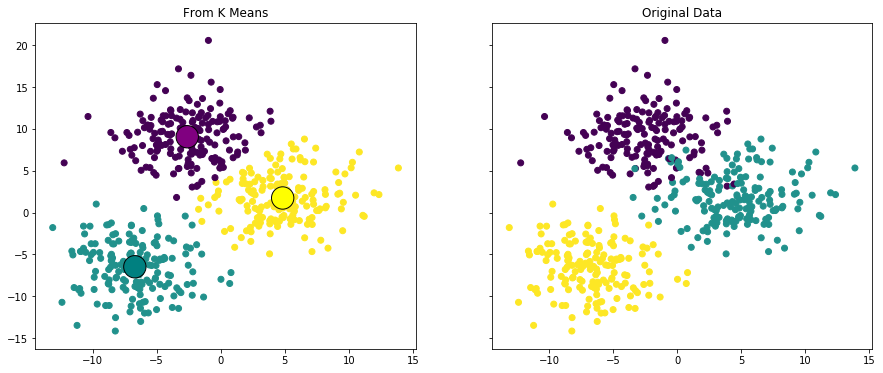

In [2]:
#Invocating k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,1]

#Visualize the algorithm
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,6))
ax1.set_title('From K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeans.labels_)
ax1.scatter(c_x,c_y,marker='o',s=500,edgecolors='k',c=['purple','teal','yellow'])
ax2.set_title("Original Data")
ax2.scatter(X[:,0],X[:,1],c=y)

#Show 
plt.show()

Plot on left side shows the output of clustering procedure; since there is no ordering of the clusters, so the color assigend to a cluster is arbitrary. The color of each observation just indicates the cluster
to which it was assigned by the K-means clustering algorithm. 

Now let us compare the left plot with the plot from original true data on the right. We can see in right plot that there is noisy part in the middle of purple and teal color clusters. But K-Means algorithm deals with these noisy observations by assigning them all to the same cluster based on centroid location.

## Evaluation of the Results
Its not posible in real life to evaluate the accuracy of the unsupervised algorithms because actual data labels are not available. But since we are working with simulated data, here we actually have the luxury of knowing the actual labels. Hence we use the cross-tabulation in pandas to evaluate the performance of the above application.

In [3]:
# let us create a dataframe with known and predicted labels 
y_pred = kmeans.predict(X)
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y})
ct = pd.crosstab(df['Predicted'],df['Actual'])
# get ct
print(ct)

Actual       0    1    2
Predicted               
0          161    9    0
1            0    1  166
2            6  157    0


As can be seen above in this confusion matrix that K-Means has worked very well in this simulated dataset. So, by performing such kind of cluster validation, we want to make sure that the found clusters are really representing the true subgroups in data and not just clustering the noise. As said already evaluating a accuracy matrix like above is not possible in real data, thus this question is hard to answer. But there are some techniques available to help us like assigning a p-value to cluster that we will explore in future.   

# Deciding Number of Clusters

In the demonstration above we have chosen to create 3 clusters using k-means algorithm. Since we are working with simulated dataset we knew that there were actually 3 groups in the data. But in most of the real life problems this number is unknown, and unfortunately there is no easy answer to how to choose K. In this section one way is shown a technique called elbow method that allows us to make educated guess about this parameter.

## Elbow Method
1. Choose a set of possible K values based on intuition ( for example 2, 4, 6, 8 ).
2. For each possible value, calculate the sum of squared error (SSE).
3. The SSE is calculated as the sum of the squared distance between each member of the cluster and its centroid. 
4. A graph of SSE vs K shows a falling trend because the cluster sizes become smaller with increasing number K.
5. In such a plot we look for a point of sharp discountinuity at which SSE dependence on K changes abruptly.

In scikit-learn this SSE is named ["inertia"](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

### Demonstration with Python.
Below we demonstrate the use of Elbow method using Python code. As noted above that this involve a trade-off between the inertia (SSE) and number of clusters (K). A clustering is considered good if it has low inertia yet not too many clusters. Both these goals are seemingly at cross purposes - because smaller number of clusters might lead to bigger size and hence worsen the inertia.

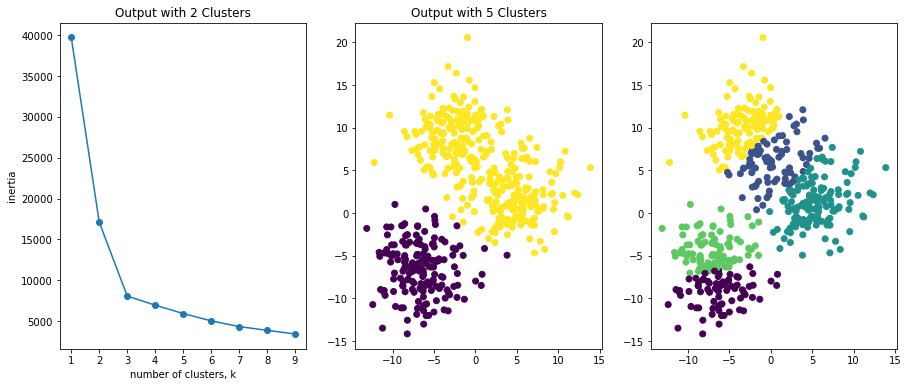

In [4]:
K_range = range(1, 10)
inertias = []
labels_5 = None
labels_2 = None
for k in K_range:
    
    kmeans = KMeans(n_clusters=k)
    # Fit data
    kmeans.fit(X)
    # gather inertia values
    inertias.append(kmeans.inertia_)
    if k==2: labels_2 = kmeans.labels_
    if k==5: labels_5 = kmeans.labels_
    
# Plot K vs inertia
f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.plot(K_range, inertias, marker='o')
ax1.set_xlabel('number of clusters, k')
ax1.set_ylabel('inertia')
ax1.set_xticks(K_range)
ax1.set_title("Output with 2 Clusters")
ax2.scatter(X[:,0],X[:,1],c=labels_2)
ax2.set_title("Output with 5 Clusters")
ax3.scatter(X[:,0],X[:,1],c=labels_5)
plt.show()

## Choosing the K
In the above slide, the left plot is a graph between SSE and K showing a sharp elbow at K=3 thus agreeing with the true number of clusters in our data simulation. In middle and extreme right plots we show the results of applying k-means algorithm for K=2 and K=5 resepectively.

# Advantages and Disadvantages

Advantages
1. As noticed above, this algorithm is very simple and easy to implement.
2. Results are easy to interpret.
3. Computationally fast and efficient than other clustering algorithms. 

Disadvantages
1. It is difficult to guess the number of clusters in several cases.
2. This algorithm is very sensitive to feature scaling. Some of the observations need to be rescaled (normalize or standardize).
3. Very sensitive to outliers.

# Summary and Conclusions

In this tutorial we discussed how to clusterize the observations based on the features in order to identify subgroups of those observations. There are several other clustering algorithms but K-Means is one of the best known approach. As we noticed above, K-Means tries to partition the observations into pre-defined number of clusters, but there is another popular clustering algorithm known as "hierarchical clustering", where we do not need to know number of clusters in advance. We will discuss it in a separate post!